# <center>TP 1 : Linear Regression<center>
-----------------------------

----------------
## Chargement des packages

In [12]:
import math                     
import numpy as np  
import pandas as pd

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from statsmodels.nonparametric.kde import KDEUnivariate
import statsmodels.api as sm
from scipy.stats import gaussian_kde
from inspect import getsourcelines  
import random
import string
import time
import urllib
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns               
import sys

from os import mkdir, rmdir, path 

from IPython.display import HTML
from IPython.display import display

%matplotlib notebook

---------------------
## Question 1 :

In [30]:
# Chargement des données et création du dataframe df
url = 'https://bitbucket.org/portierf/shared_files/downloads/Galton.txt'
df = pd.read_csv(url, sep='\t')

# Conversion des pouces en cm
#df[['Father', 'Mother', 'Height']] = 2.54 * df[['Father', 'Mother', 'Height']]
# pd.set_option('precision', 0) # permet de ne pas garder de chiffres après la virgule sur les valeurs converties mais pourra affecter le traitement par la suite
print('Le fichier contient ' + str(df.shape[0]) + ' lignes.\n') 
df.head()

Le fichier contient 898 lignes.



,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [31]:
# Vérification de données manquantes 
null_data = df[df.isnull().any(axis=1)]
print("Il y a " + str(df.isnull().sum().sum()) +
      ' valeurs manquantes.')

Il y a 0 valeurs manquantes.


Il n'y a donc **pas de données manquantes** dans cette table.

------------
## Question 2 :

In [32]:
# Création de la colonne "MeanParents" dans le dataframe df
df['MeanParents'] = 0.5 * (df['Father'] + 1.08 * df['Mother'])
df.head()

,Family,Father,Mother,Gender,Height,Kids,MeanParents
0,1,78.5,67.0,M,73.2,4,75.43
1,1,78.5,67.0,F,69.2,4,75.43
2,1,78.5,67.0,F,69.0,4,75.43
3,1,78.5,67.0,F,69.0,4,75.43
4,2,75.5,66.5,M,73.5,4,73.66


On note $x_i$ la taille du parent moyen pour la famille i et $y_i$ la taille de l’enfant. On écrit $y_i = \theta_1 x_i + \theta_0 + \epsilon_i$ et on modélise les variables $\epsilon_i$ comme centrées, indépendantes de même
variance $\sigma^2$ inconnue.

--------------------
## Question 3 :

On va tracer le nuage de point ($x_i$, $y_i$) pour $1 ≤ i ≤ n$ où n est le nombre d’observations figurant dans les données, donc **898** d'après la question 1.

<IPython.core.display.Javascript object>


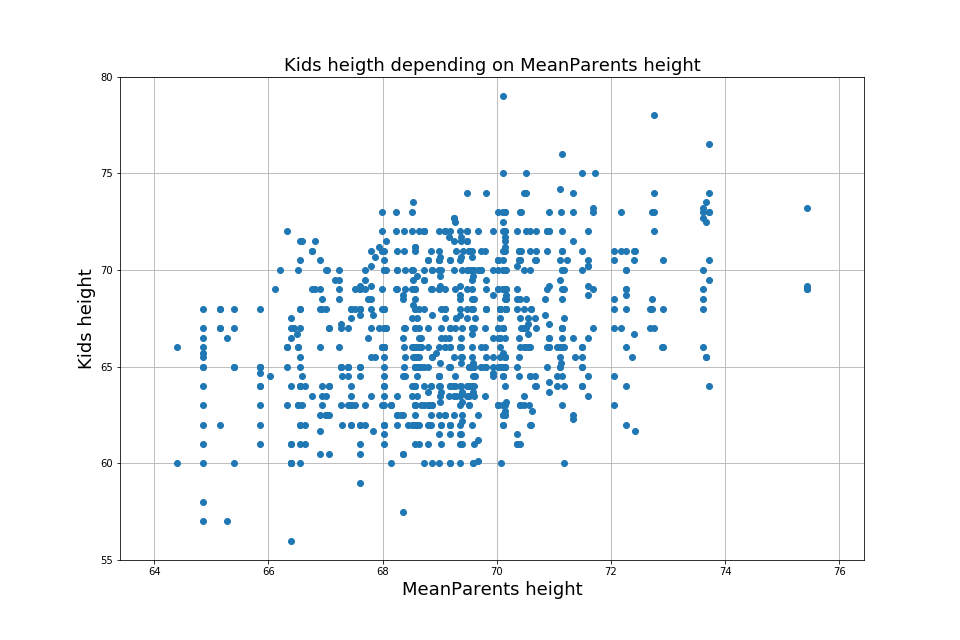

In [35]:
plt.figure()
y = df['Height']
x = df[['MeanParents']]
plt.plot(x, y, 'o',label="")
plt.ylabel('Kids height', fontsize=18)
plt.ylim([df['Height'].min()-1, df['Height'].max()+1])
plt.xlabel('MeanParents height', fontsize=18)
plt.xlim([df['MeanParents'].min()-1, df['MeanParents'].max()+1])
#skl_lm = linear_model.LinearRegression(fit_intercept=True)
#skl_lm.fit(X, y)
#plt.plot(x_grid, skl_lm.predict(x_grid.reshape(x_grid.shape[0], 1)), '-', label='Model prediction')
#plt.legend()
plt.title("Kids heigth depending on MeanParents height", fontsize=18)
plt.grid(True)
plt.show()

#print(skl_lm.score(X, y))  # it is pretty small...

## Question 4 :

Estimation de $\theta_0$, $\theta_1$ par $\widehat{\theta_0}$, $\widehat{\theta_1}$ en utilisant la fonction `LinearRegression` de `sklearn`. 

In [39]:
x0 = df[['MeanParents']]
y = df['Height']
skl_lm = linear_model.LinearRegression()
skl_lm.fit(x0, y)
theta0 = skl_lm.intercept_
theta1 = skl_lm.coef_[0]
y_mean = y.mean()
x0_mean = (x0.mean(axis=0)).squeeze()
x0_var = x0.var(ddof=0).squeeze()
y_var = y.var(ddof=0)
#theta1_manual = ((x0.squeeze() - x0_mean) * (y - y_mean)).mean() / x0_var
#theta0_manual = y_mean - theta1_manual * x0_mean
print('Theta_0 vaut ' + str(theta0))
print('Theta_1 vaut ' + str(theta1))

#print(theta1_manual)

#print('Are the two computations of theta1' +
      #' the same? This is {} and theta1={}'.format(np.isclose(theta1, theta1_manual),theta1))

#print('Are the two computations of theta0' +
      #' the same? This is {}, and theta0={}'.format(np.isclose(theta0, theta0_manual),theta0))

Theta_0 vaut 22.376205683004223
Theta_1 vaut 0.6411903795908174


Calcul et visualisation des valeurs prédites $\widehat{y_i} = \widehat{\theta_1} x_i + \widehat{\theta_0}$ et $y_i$ sur un même graphique.

<IPython.core.display.Javascript object>


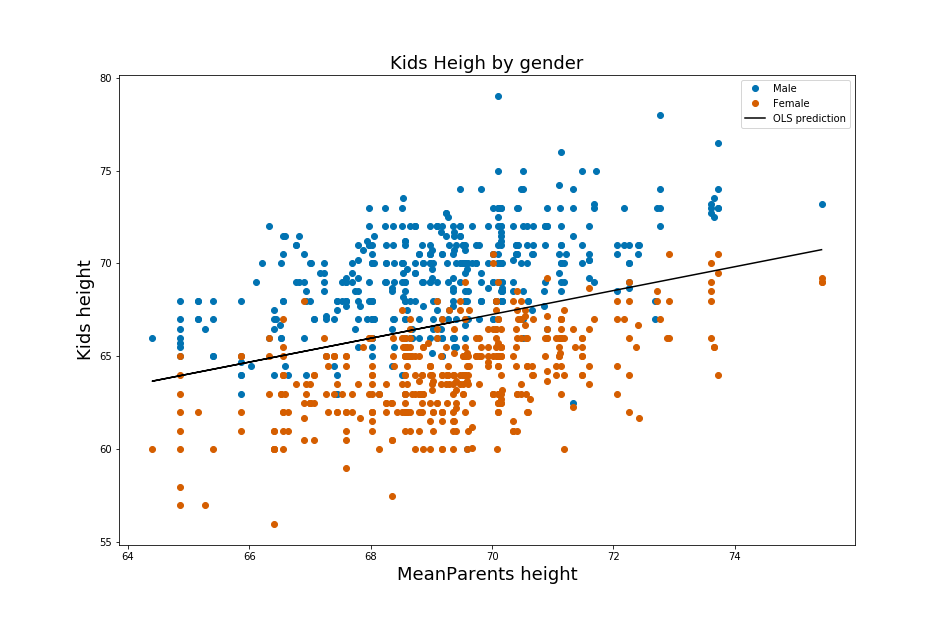

In [48]:
male = df['Gender'] == 'M'
female = df['Gender'] == 'F'
fig = plt.figure()
color_blind_list = sns.color_palette("colorblind", 8) # pour pouvoir choisir la couleur des points
plt.plot(df['MeanParents'][male], y[male], 'o', c=color_blind_list[0], label="Male")
plt.plot(df['MeanParents'][female], y[female], 'o', c=color_blind_list[3], label="Female")
plt.plot(x0, skl_lm.predict(x0), label='OLS prediction', c='k')
plt.xlabel('MeanParents height', fontsize=18)
plt.ylabel('Kids height', fontsize=18)
plt.title("Kids Heigh by gender", fontsize=18)
plt.legend()
plt.show()